# Analyzing Features

This section aims to dive deeper into features that the higher-level analysis found to be the most important. We will observe their correlation with each other, as well as their trends compared to the dependent variable.

## Load the data

In [29]:
import pandas as pd

# Load the data into a dataframe
data_path = "../adult/adult.data"  # Adjust the file path as needed
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]
train_df = pd.read_csv(data_path, header=None, names=column_names)
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Age vs Income

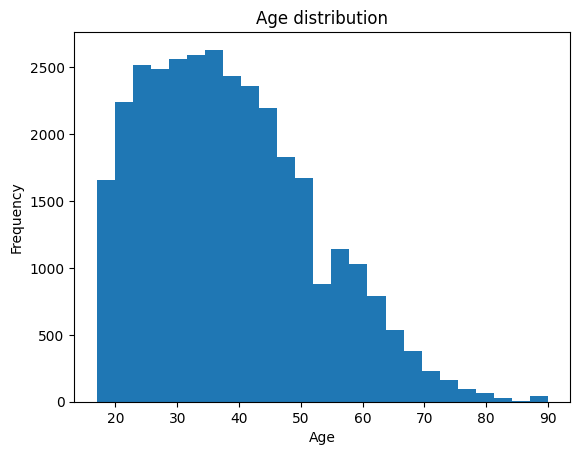

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Histogram of age
plt.hist(train_df['age'], bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

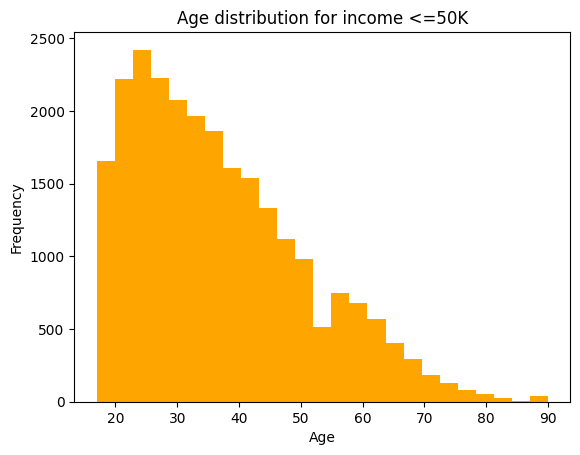

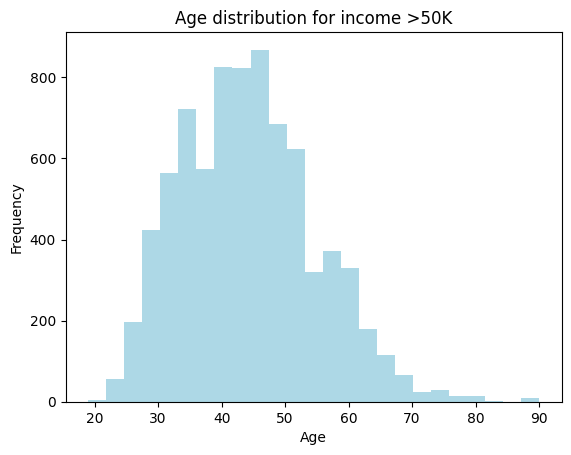

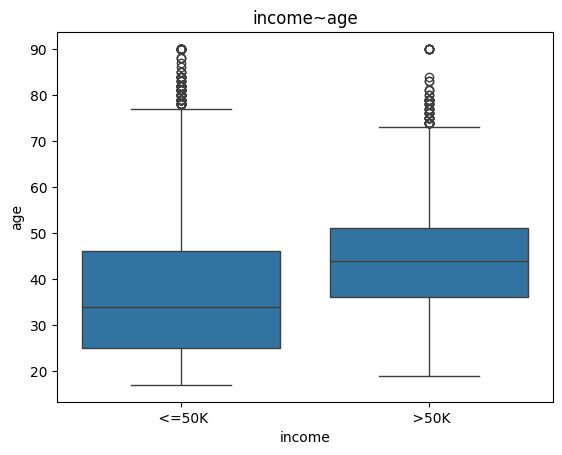

In [42]:
poor = train_df[train_df['income'] == ' <=50K']
rich = train_df[train_df['income'] == ' >50K']

# Histogram of age for poor
plt.hist(poor['age'], bins=25, color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution for income <=50K')
plt.show()

# Histogram of age for rich
plt.hist(rich['age'], bins=25, color='lightblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution for income >50K')
plt.show()

sns.boxplot(x='income', y='age', data=train_df)
plt.xlabel('income')
plt.ylabel('age')
plt.title('income~age')
# plt.xticks(rotation=90)
plt.show()


In [16]:
poor_mean_age = poor['age'].mean()
rich_mean_age = rich['age'].mean()

print("Mean age for income <=50K:", round(poor_mean_age, 2))
print("Mean age for income >50K:", round(rich_mean_age, 2))

Mean age for income <=50K: 36.78
Mean age for income >50K: 44.25


## Sex vs Income

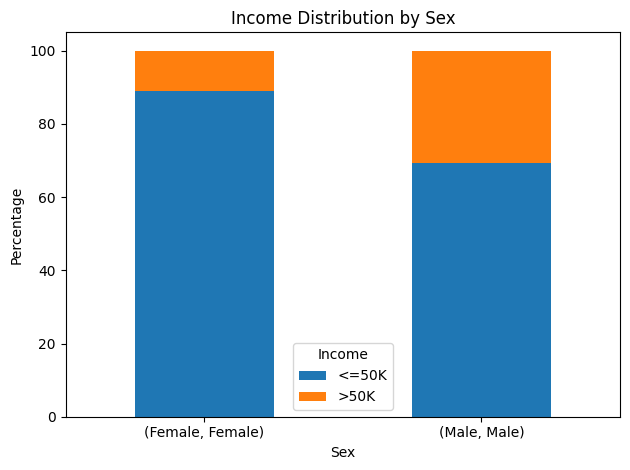

In [17]:
train_df['income'] = train_df['income'].str.strip()
train_df['sex'] = train_df['sex'].str.strip()
train_df['race'] = train_df['race'].str.strip()

sex_income_dist = (
    train_df.groupby(['sex', 'income'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

sex_income_dist.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Sex')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Race and Age vs Income:

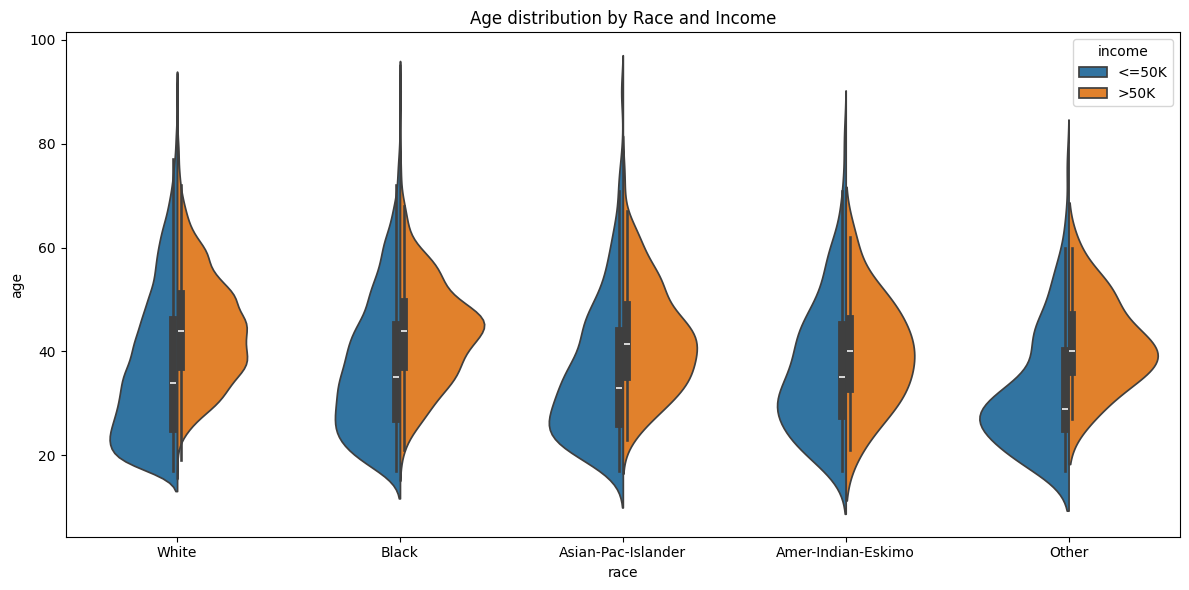

In [18]:
# A violin plot of Age distribution by race, and income
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_df, x='race', y='age', hue='income', split=True)
plt.title('Age distribution by Race and Income')
plt.tight_layout()
plt.show()


## Race vs Income

income                                     <=50K       >50K
race               race                                    
Amer-Indian-Eskimo Amer-Indian-Eskimo  88.424437  11.575563
Asian-Pac-Islander Asian-Pac-Islander  73.435996  26.564004
Black              Black               87.612036  12.387964
Other              Other               90.774908   9.225092
White              White               74.414006  25.585994


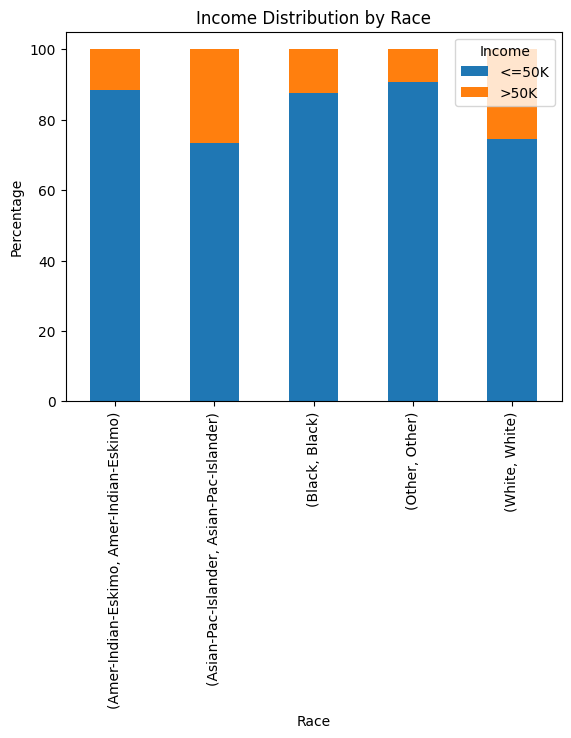

In [79]:
race_inc_df = pd.DataFrame()
race_inc_df['income'] = train_df['income'].str.strip()
race_inc_df['race'] = train_df['race'].str.strip()

race_income_dist = (
    race_inc_df.groupby(['race', 'income'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

print(race_income_dist)
race_income_dist.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.legend(title='Income')
plt.xticks(rotation=90)
plt.show()
